<a href="https://colab.research.google.com/github/SanjayNithin2002/Phising-Detection-Using-Data-Mining-Techniques/blob/main/DMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import statsmodels.api as sm

In [40]:
df = pd.read_csv("/content/drive/MyDrive/Phising-Detection-Using-Data-Mining-Techniques/dataset_full.csv")

In [41]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [42]:
df.isnull()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
88643,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
88644,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
88645,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
df.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [45]:
df.isnull().sum().sum()

0

In [46]:
df.max()[df.max() > 0].index
# definitely have to scale the data

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
       'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url',
       'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url',
       'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain',
       'qty_at_domain', 'qty_vowels_domain', 'domain_length', 'domain_in_ip',
       'server_client_domain', 'qty_dot_directory', 'qty_hyphen_directory',
       'qty_underline_directory', 'qty_slash_directory', 'qty_equal_directory',
       'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory',
       'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory',
       'qty_plus_directory', 'qty_asterisk_directory', 'qty_dollar_directory',
       'qty_percent_directory', 'directory_length', 'qty_dot_file',
       'qty_hyphen_file',

In [47]:
df = df[df.max()[df.max() > 0].index]

In [48]:
df.head

<bound method NDFrame.head of        qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0                3               0                  0              1   
1                5               0                  1              3   
2                2               0                  0              1   
3                4               0                  2              5   
4                2               0                  0              0   
...            ...             ...                ...            ...   
88642            3               1                  0              0   
88643            2               0                  0              0   
88644            2               1                  0              5   
88645            2               0                  0              1   
88646            2               0                  0              0   

       qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                         0       

In [49]:
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,0.086957,0.000000,0.000000,0.022727,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.08,0.10,0.00,0.001477,0.0,0.055556,0.5,0.5,0.0,1.0
1,0.173913,0.000000,0.047619,0.068182,0.0,0.130435,0.0,0.076923,0.0,0.0,...,0.08,0.10,0.05,0.015775,1.0,0.055556,0.5,0.5,0.0,1.0
2,0.043478,0.000000,0.000000,0.022727,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.08,0.10,0.15,0.000976,1.0,0.055556,0.5,0.5,0.0,0.0
3,0.130435,0.000000,0.095238,0.113636,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.08,0.10,0.00,0.000484,1.0,0.055556,0.5,0.5,0.0,1.0
4,0.043478,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.08,0.10,0.05,0.005949,0.0,0.111111,0.5,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,0.086957,0.028571,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.08,0.15,0.05,0.005949,0.0,0.055556,0.5,0.5,0.0,0.0
88643,0.043478,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.08,0.10,0.10,0.000979,0.0,0.166667,0.5,0.5,0.0,0.0
88644,0.043478,0.028571,0.000000,0.113636,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.08,0.10,0.25,0.023796,1.0,0.055556,0.5,0.5,0.0,1.0
88645,0.043478,0.000000,0.000000,0.022727,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.08,0.05,0.05,0.000088,1.0,0.055556,0.5,0.5,0.0,1.0


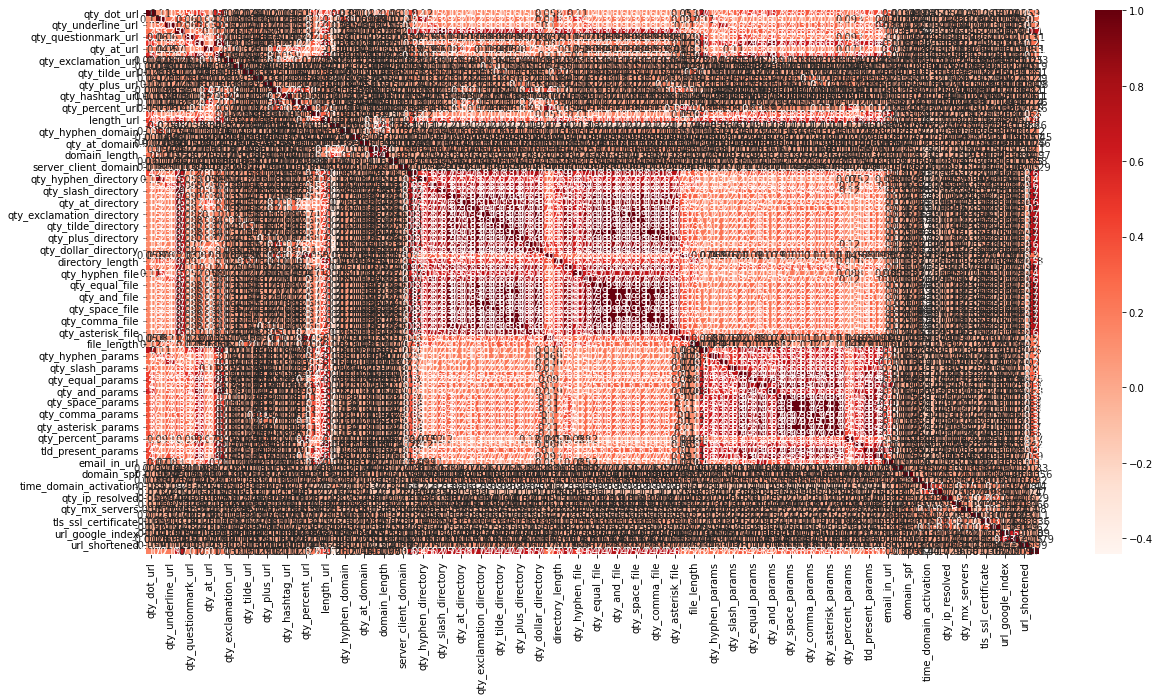

In [50]:
plt.figure(figsize=(20,10))
cor = normalized_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [51]:
cor_target = abs(cor["phishing"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

qty_slash_url                0.699061
qty_dot_directory            0.690271
qty_underline_directory      0.623106
qty_slash_directory          0.746454
qty_equal_directory          0.737922
qty_at_directory             0.682272
qty_and_directory            0.702265
qty_exclamation_directory    0.742187
qty_space_directory          0.740026
qty_tilde_directory          0.739571
qty_comma_directory          0.742251
qty_plus_directory           0.732842
qty_asterisk_directory       0.651520
qty_dollar_directory         0.734923
directory_length             0.525694
qty_dot_file                 0.733008
qty_underline_file           0.636585
qty_equal_file               0.743692
qty_at_file                  0.745509
qty_and_file                 0.744860
qty_exclamation_file         0.745059
qty_space_file               0.742749
qty_tilde_file               0.744657
qty_comma_file               0.742364
qty_plus_file                0.735140
qty_asterisk_file            0.684798
phishing    

In [52]:
print(relevant_features.index)

Index(['qty_slash_url', 'qty_dot_directory', 'qty_underline_directory',
       'qty_slash_directory', 'qty_equal_directory', 'qty_at_directory',
       'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory', 'qty_dollar_directory', 'directory_length',
       'qty_dot_file', 'qty_underline_file', 'qty_equal_file', 'qty_at_file',
       'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file', 'phishing'],
      dtype='object')


In [53]:
normalized_df_new = normalized_df[relevant_features.index]

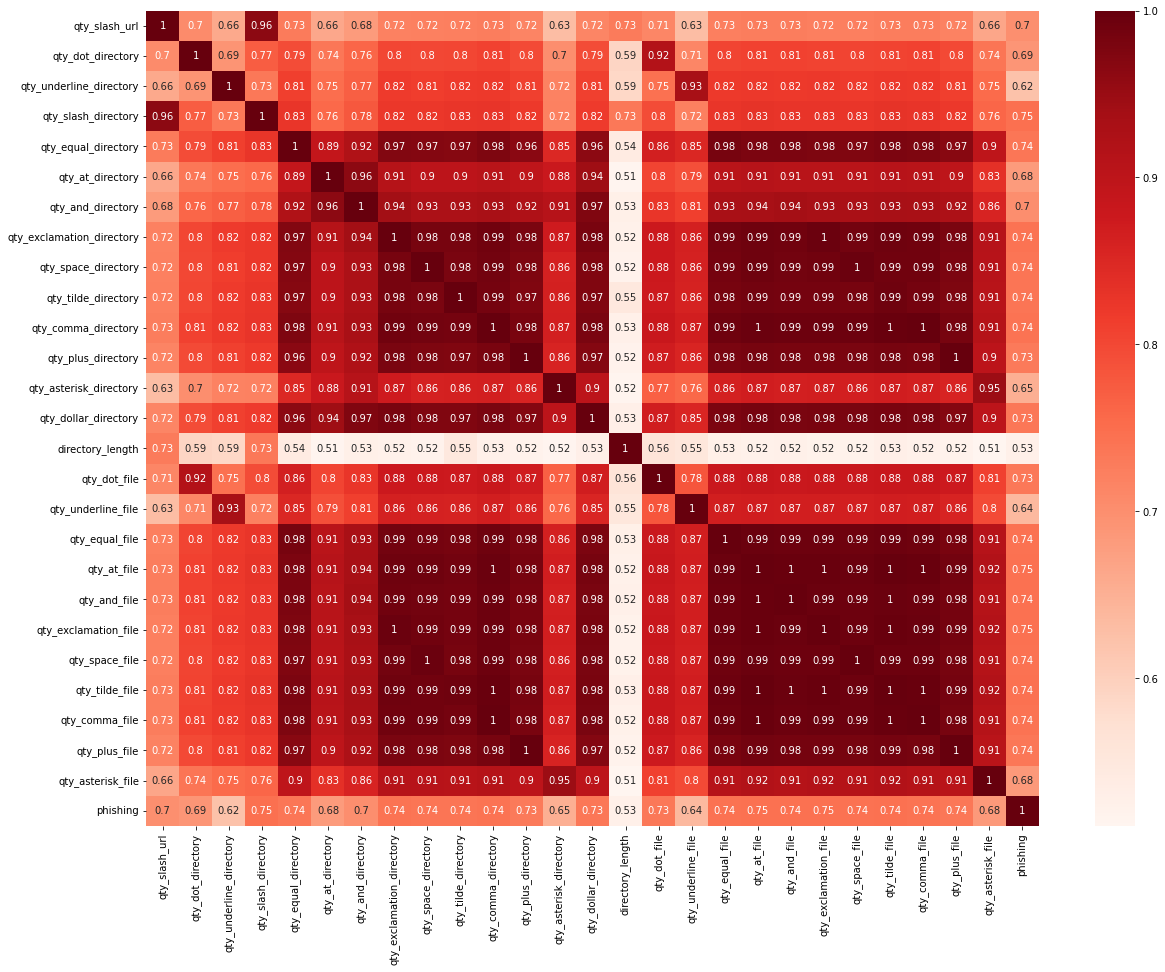

In [54]:
plt.figure(figsize=(20,15))
cor = normalized_df_new.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [55]:
y = normalized_df["phishing"]
X = normalized_df.iloc[: , :-1]

In [56]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
# search about this

Best alpha using built-in LassoCV: 0.000059
Best score using built-in LassoCV: 0.685187


In [57]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 38 variables and eliminated the other 53 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

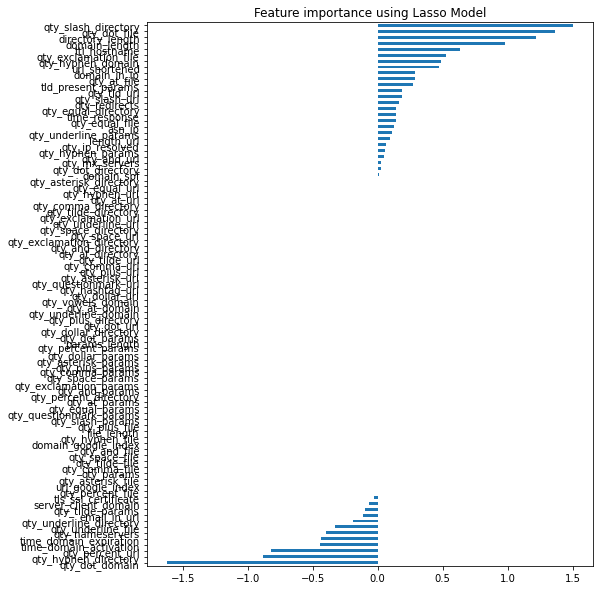

In [58]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [59]:
imp_coef

qty_dot_domain           -1.622627
qty_hyphen_directory     -0.885297
qty_percent_url          -0.818873
time_domain_activation   -0.441739
time_domain_expiration   -0.433620
                            ...   
ttl_hostname              0.634440
domain_length             0.978458
directory_length          1.219940
qty_dot_file              1.367050
qty_slash_directory       1.502163
Length: 91, dtype: float64

In [60]:
df = normalized_df[imp_coef[imp_coef != 0].index]

In [61]:
df

,qty_dot_domain,qty_hyphen_directory,qty_percent_url,time_domain_activation,time_domain_expiration,qty_nameservers,qty_underline_file,qty_underline_directory,email_in_url,qty_tilde_params,...,qty_at_file,domain_in_ip,url_shortened,qty_hyphen_domain,qty_exclamation_file,ttl_hostname,domain_length,directory_length,qty_dot_file,qty_slash_directory
0,0.095238,0.041667,0.0,0.000000,0.000000,0.10,0.055556,0.055556,0.0,0.0,...,0.333333,0.0,0.0,0.000000,0.2,0.001477,0.057269,0.006993,0.153846,0.086957
1,0.095238,0.041667,0.0,0.032628,0.006689,0.10,0.055556,0.055556,0.0,0.5,...,0.333333,0.0,0.0,0.000000,0.2,0.015775,0.052863,0.033411,0.153846,0.173913
2,0.095238,0.041667,0.0,0.000000,0.000000,0.10,0.055556,0.055556,0.0,0.0,...,0.333333,0.0,0.0,0.000000,0.2,0.000976,0.044053,0.001554,0.076923,0.086957
3,0.095238,0.041667,0.0,0.000000,0.000000,0.10,0.055556,0.166667,0.0,0.0,...,0.333333,0.0,0.0,0.000000,0.2,0.000484,0.066079,0.048951,0.153846,0.260870
4,0.095238,0.000000,0.0,0.393733,0.013599,0.10,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.005949,0.066079,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,0.142857,0.000000,0.0,0.309968,0.014839,0.15,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.090909,0.0,0.005949,0.083700,0.000000,0.000000,0.000000
88643,0.095238,0.000000,0.0,0.283922,0.019136,0.10,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000979,0.132159,0.000000,0.000000,0.000000
88644,0.047619,0.083333,0.0,0.103792,0.031584,0.10,0.055556,0.055556,0.0,0.0,...,0.333333,0.0,0.0,0.000000,0.2,0.023796,0.079295,0.038073,0.153846,0.260870
88645,0.095238,0.041667,0.0,0.000000,0.000000,0.05,0.055556,0.055556,0.0,0.0,...,0.333333,0.0,0.0,0.000000,0.2,0.000088,0.101322,0.001554,0.076923,0.086957


In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
df = pca.fit_transform(df)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20, random_state=42)

In [64]:
from sklearn import svm
svm_model = svm.SVC().fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
svm_score = accuracy_score(y_test, y_pred,normalize = True)
print(svm_score)
precision_recall_fscore_support(y_test, y_pred, average='macro')

0.9328257191201353


(0.9227129087730737, 0.930543284291695, 0.9263886686092072, None)

In [65]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=0, multi_class = "ovr").fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
lr_score = accuracy_score(y_test, y_pred,normalize = True)
print(lr_score)
precision_recall_fscore_support(y_test, y_pred, average='macro')

0.924478285391991


(0.9130089221248017, 0.9226625475759371, 0.9174511466067785, None)

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(max_depth=100, random_state=0).fit(X_train,y_train)
y_pred = rfc_model.predict(X_test)
rfc_score = accuracy_score(y_test,y_pred,normalize=True)
print(rfc_score)
precision_recall_fscore_support(y_test, y_pred, average='macro')

0.9622673434856176


(0.9575501896751182, 0.9591294421333929, 0.9583316381901286, None)